In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from pathlib import Path
base_path = Path('/content/drive/MyDrive/ML/EDA_Titanic')

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

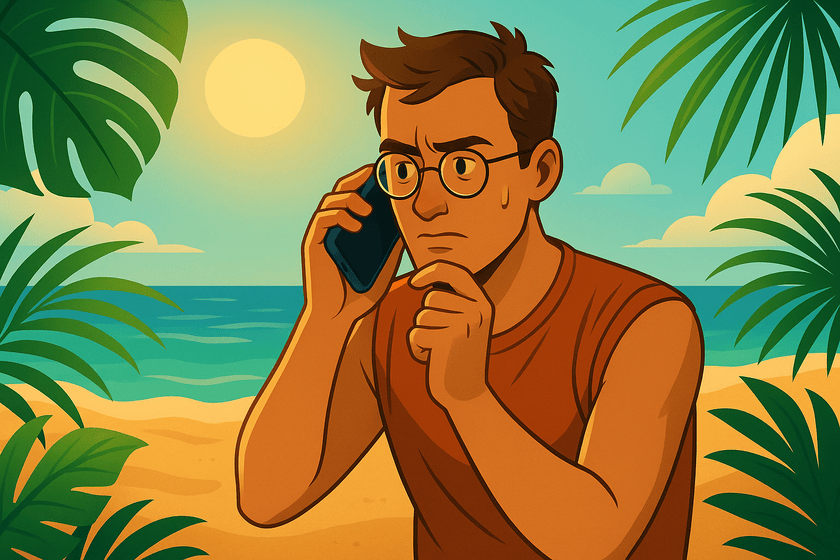

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


# Wstępny podgląd danych

Wczytanie pliku:

In [186]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

Szybki ogólny podgląd:

In [187]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pokazały nam się pierwsze poglądowe wiersze. \\
Klasą predykowaną jest `Survived`.

Wczytane dane to DataFrame (ramka danych):

In [188]:
type(titanic_df)

pandas.core.frame.DataFrame

Wielkość ramki:

In [189]:
titanic_df.shape

(891, 11)

Mamy 891 wierszy i 11 kolumn. \\
Teraz sprawdźmy jakich typów są konkretne kolumny:

In [190]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [191]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Można spojrzeć na podsumowania kolumn:

In [192]:
titanic_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Oczyszczenie danych

Zaczniemy od zidentyfikowania ewentualnych duplikatów wierszy:

In [193]:
titanic_df.drop_duplicates(inplace=True)

Usuniemy niepotrzebnye spacje w kolumnach typu `object`:

In [194]:
categorical_columns = titanic_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  titanic_df[col] = titanic_df[col].str.strip()

Zmienienie całego tekstu w `categorical_columns` na pisane małymi literami:

In [195]:
titanic_df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"montvila, rev. juozas",male,27.0,0,0,211536,13.0000,NaN,s
888,1,1,"graham, miss. margaret edith",female,19.0,0,0,112053,30.0000,b42,s
889,0,3,"johnston, miss. catherine helen ""carrie""",female,NaN,1,2,w./c. 6607,23.4500,NaN,s


Spójrzmy też czy wszystkie wartości w kolumnach `Survived`, `Pclass`, `Sex`, `Embarked` są jednymi z opcji, jakie można wybrać:

In [196]:
for col in ["Sex", "Embarked", "Pclass", "Survived"]:
    print(col, titanic_df[col].unique())

Sex ['male' 'female']
Embarked ['S' 'C' 'Q' nan]
Pclass [3 1 2]
Survived [0 1]


Można też łatwo zauważyć, że przydałaby się dodatkowa kolumna `IsAlone`, która sprawdzałaby, czy na pokładzie jest ktoś bliski pasażerowi.

In [197]:
new_column = pd.Series(
    data=((titanic_df['SibSp'] + titanic_df['Parch']) == 0).astype(int),
    index=titanic_df.index,
    name='IsAlone'
)

titanic_df = pd.concat([titanic_df, new_column], axis=1)

titanic_df[['SibSp', 'Parch', 'IsAlone']]

,SibSp,Parch,IsAlone
PassengerId,,,
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,1,2,0


# Identyfikacja kolumn, które nie są istotne w kontekście zadania

Przypomnijmy jakie kolumny mamy:

In [198]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Na początek możemy przyjrzeć się kolumnom i ocenić "na logikę". Trzeba ocenić czy wszystkie atrybuty mają jakikolwiek wpływ czy pasażer przeżył (czyli czy ma wpływ na `Survived`). Patrząc na pierwszy rzut oka, można wyciągnąć wnioski, że `Name` i `Ticket` są unikalnymi identyfikatorami i nie mają wpływu. Jednak z `Name` moglibyśmy wyciągnąć wartości takie jak *Mr, Mrs, Miss...*, jeśli w którymś z wierszy brakowałoby wartości w kolumnie `Sex`. Możliwe też, że wartość `Ticket` będzie miała wpływ na `Cabin`, więc narazie zostawię obie - jeśli okażą się nieprzydatne, usunę je w dalszej części.

Przyjrzyjmy się kolumnie `Sex` - czy są tam brakujące wartości.




In [199]:
titanic_df['Sex'].isnull().sum()

np.int64(0)

W kolumnie `Sex` nie ma wartości brakujących, które musielibyśmy uzupełniać. Tak więc możemy usunąć kolumnę `Name` - nie będzie nam ona potrzebna.

In [200]:
titanic_df.drop(columns=['Name'], inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


Następnie można sprawdzić, czy każda kolumna jest wystarczająco zapełniona. W przypadku, gdy w danej kolumnie występują jedynie pojedyncze wartości, może być niemiarodajna.

In [201]:
titanic_df.isnull().mean()

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.109989
Cabin,0.771044
Embarked,0.002245


Widać, że kolumna `Cabin` ma dużo brakujących danych (ok. 77,1%). Informacja o `Cabin` jednak może się okazać bardzo przydatna w przyszłości, a dodatkowo można ją uzupełnić dzięki `Ticket` albo `Fare`. Nie powinno się usuwać kolumn, o ile nie ma pewności, że nie będą przydatne (chociażby pośrednio) - tak więc zostawiamy ją narazie.

# Wartości brakujące

Zacznijmy od sprawdzenia czy nie ma przypadkiem całego wiersza pustego - zdarza się to żadko, ale jednak warto się upewnić.

In [202]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)

  return missing_rows_perc[missing_rows_perc > 0]

In [203]:
missing_rows_mi = get_percentage_missing(titanic_df, axis=1)
missing_rows_mi.unique()

array([ 9.09, 18.18, 27.27])

In [204]:
missing_all_column_values = missing_rows_mi[missing_rows_mi == 100].index
titanic_df[missing_all_column_values].sum()

,0


Jak widać, nie ma takich wierszy.

Przypomnijmy jak wyglądały braki w poszczególnych kolumnach:

In [205]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687
Embarked,2


Przyjrzyjmy się po kolei każdej kolumnie, która ma braki: \\
`Age` - jest to wartość liczbowa, aby odpowiednio dobrać metodę uzupełniania potrzebujemy rozkład wartości w tej kolumnie.

In [206]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [207]:
age_count_prob = get_column_distribution(titanic_df, 'Age')
age_count_prob

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


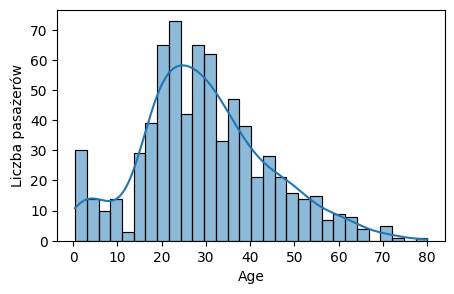

In [208]:
plt.figure(figsize=(5,3))
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Liczba pasażerów')
plt.show()

Rozkład danych jest lekko niesymetryczny - użyjemy mediany do uzupełnienia brakujących danych.

In [209]:
age_median = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(age_median)

In [210]:
titanic_df['Age'].isnull().sum()

np.int64(0)

Z powodzeniem uzupełniliśmy braki medianą w tej kolumnie. \\
Następną kolumną z brakującymi danymi jest `Fare`. Ponownie patrzymy na rozkład wartości.

In [211]:
fare_count_prob = get_column_distribution(titanic_df, 'Fare')
fare_count_prob

,proportion
Fare,
13.0000,0.047919
8.0500,0.046658
7.8958,0.042875
7.7500,0.037831
26.0000,0.036570
...,...
6.4375,0.001261
39.4000,0.001261
13.8583,0.001261


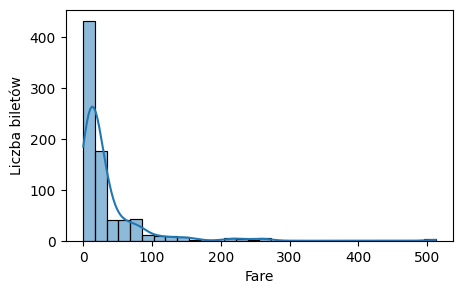

In [212]:
plt.figure(figsize=(5,3))
sns.histplot(titanic_df['Fare'].dropna(), bins=30, kde=True)
plt.xlabel('Fare')
plt.ylabel('Liczba biletów')
plt.show()

Ten rozkład też jest mocno skośny - także będziemy uzupełniać za pomocą mediany.

In [213]:
fare_median = titanic_df['Fare'].median()
titanic_df['Fare'] = titanic_df['Fare'].fillna(fare_median)

In [214]:
titanic_df['Fare'].isnull().sum()

np.int64(0)

Jeśli chodzi o `Cabin` - ta kolumna ma bardzo dużo braków. Co więcej, każda z istniejących wartości jest różna od siebie. Myślę, że dobrym pomysłem jest stworzenie nowej kolumny `HasCabin`, w której będziemy sprawdzać czy wartość w kolumnie `Cabin` istniała (1) czy nie (0).

In [215]:
new_column = pd.Series(
    data=titanic_df['Cabin'].notna().astype(int),
    index=titanic_df.index,
    name='HasCabin'
)

titanic_df = pd.concat([titanic_df, new_column], axis=1)

titanic_df[['Cabin', 'HasCabin']]

,Cabin,HasCabin
PassengerId,,
1,NaN,0
2,C85,1
3,NaN,0
4,C123,1
5,NaN,0
...,...,...
887,NaN,0
888,B42,1
889,NaN,0


Możemy teraz usunąć kolumnę `Cabin` - nie będzie nam już więcej potrzebna.

In [216]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone,HasCabin
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,1
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
4,1,1,female,35.0,1,0,113803,53.1000,S,0,1
5,0,3,male,35.0,0,0,373450,8.0500,S,1,0


Skoro usunęliśmy już `Cabin`, a kolumnę `Ticket` zostawiliśmy tylko, aby uzupełnić ewentualne braki w `Cabin` to możemy bezpiecznie usunąć `Ticket` - nie będzię nam ona więcej potrzebna.

In [217]:
titanic_df.drop(columns=['Ticket'], inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,HasCabin
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,0
2,1,1,female,38.0,1,0,71.2833,C,0,1
3,1,3,female,26.0,0,0,7.9250,S,1,0
4,1,1,female,35.0,1,0,53.1000,S,0,1
5,0,3,male,35.0,0,0,8.0500,S,1,0


Kolumna `Embarked`jest kategorialna. Możemy utworzyć nową, sztuczną kategorię „Unknown” / „Other” albo uzupełnić najczęstszą wartością. Ze względu na niską liczbę brakujących wartości w tej kolumnie, nie opłaca się tworzenie nowej kategorii - zastępujemy ją najczęściej występującą aktualnie wartością.

In [218]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


Jest to "S".

In [219]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [220]:
titanic_df['Embarked'].isnull().sum()

np.int64(0)

Z powodzeniem uzupełniliśmy braki w każdej kolumnie.

# Sprawdzenie czy typy danych są odpowiednie do znaczenia kolumny oraz ich przekodowanie

In [221]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object
IsAlone,int64
HasCabin,int64


Algorytmy uczenia maszynowego nie są w stanie przetrawić wartości tekstowych w ich prawdziwej formie. Wymagają one od nas wcześniejszego zakodowania do postaci liczbowej. Wartości z kolumny `Sex` musimy w takim wypadku zakodować.

In [222]:
titanic_df['Sex'] = titanic_df.Sex.map({
    'female': 1, 'male': 2
})
titanic_df['Sex'].value_counts()

,count
Sex,
2,577
1,314


Kolumnę `Embarked` także, ale tutaj dokonamy tego w inny sposób.

In [223]:
mapping = {
    'C': 1,
    'Q': 2,
    'S': 3
}

titanic_df['Embarked'] = titanic_df['Embarked'].map(mapping)
titanic_df.Embarked.value_counts()

,count
Embarked,
3,646
1,168
2,77


Sprawdźmy czy teraz już wszytskie typy są odpowiednie

In [224]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64
IsAlone,int64
HasCabin,int64


Wszystkie typy są już numeryczne albo kategorialne, ale zakodowane.

#  Analiza i wizualizacja rozkładów

Zacznijmy analize od wizualizacji zmiennych numerycznych na histogramach:

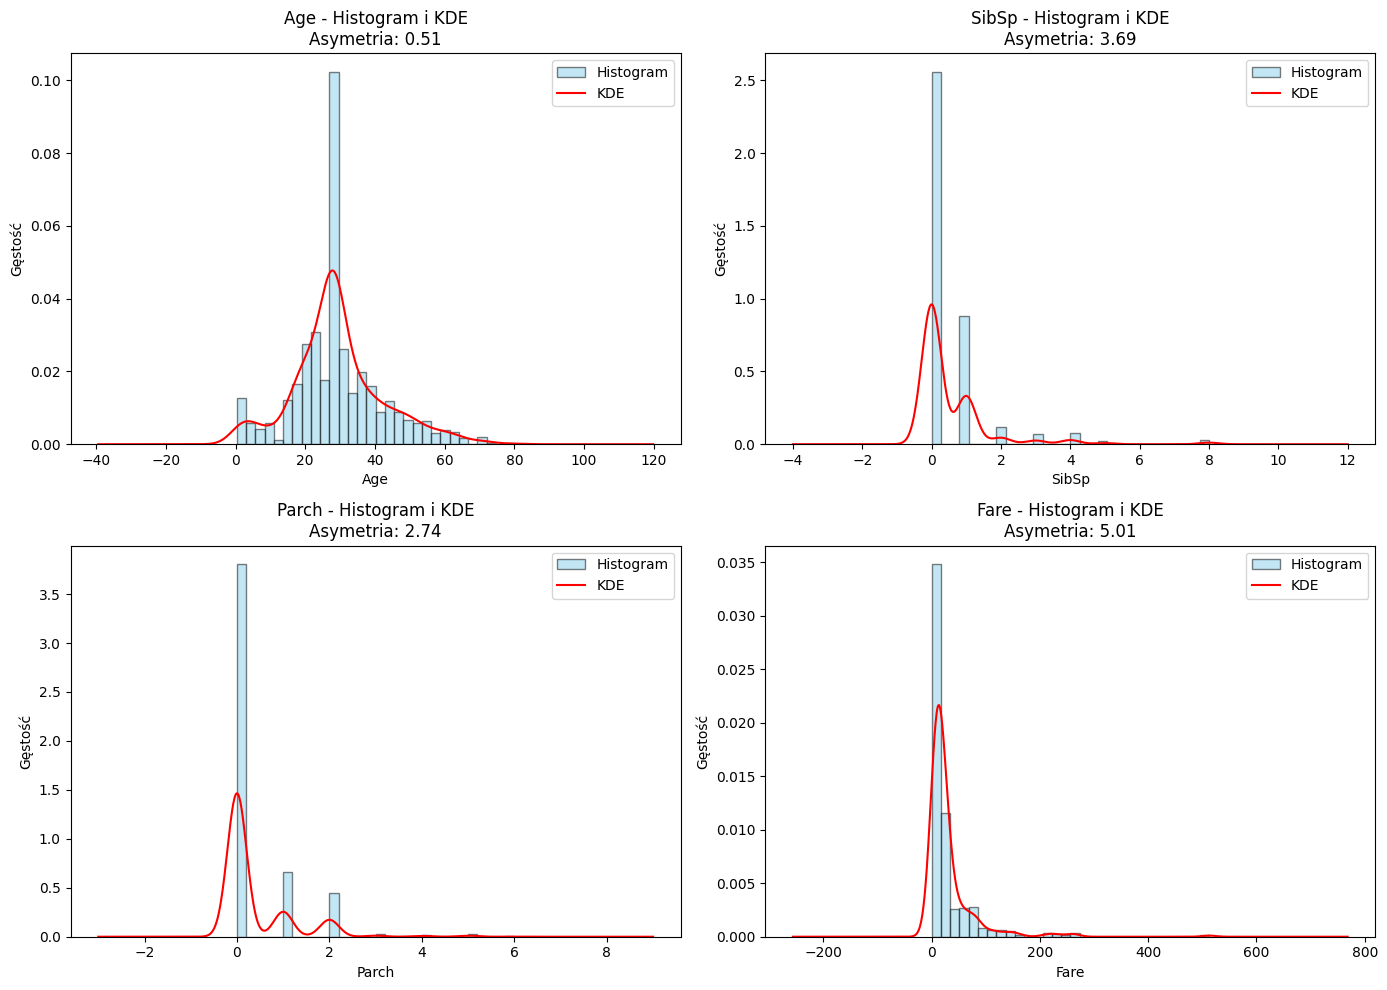

In [225]:
# Lista kolumn do analizy
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    data = titanic_df[col].dropna()

    # Histogram z gęstością
    plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black', label='Histogram')

    # Gęstość
    data.plot(kind='density', ax=plt.gca(), color='red', label='KDE')

    # Obliczenie asymetrii
    skewness = skew(data)

    plt.title(f'{col} - Histogram i KDE\nAsymetria: {skewness:.2f}')
    plt.xlabel(col)
    plt.ylabel('Gęstość')
    plt.legend()

plt.tight_layout()
plt.show()

Wnioski jakie możemy wyciągnąć są takie, że jest więcej pasażerów w młodszym i średnim wieku oraz mniejsza liczba bardzo starszych. Większość pasażerów podróżowała bez rodziny lub z niewielką ich liczbą, a tylko nieliczni mieli więcej niż kilka osób towarzyszących. Większość pasażerów płaciła stosunkowo niskie lub średnie ceny biletów, ale są pojedyncze przypadki bardzo drogich biletów (prawdopodobnie outliery/skrajne wartości).

Dodatkowo - można powiedzieć, że wykres `Age` ma rozkład raczej normalny, reszta jest asymetryczna.

Zmienne kategoryczne przedstawmy na wykresach słupkowych:

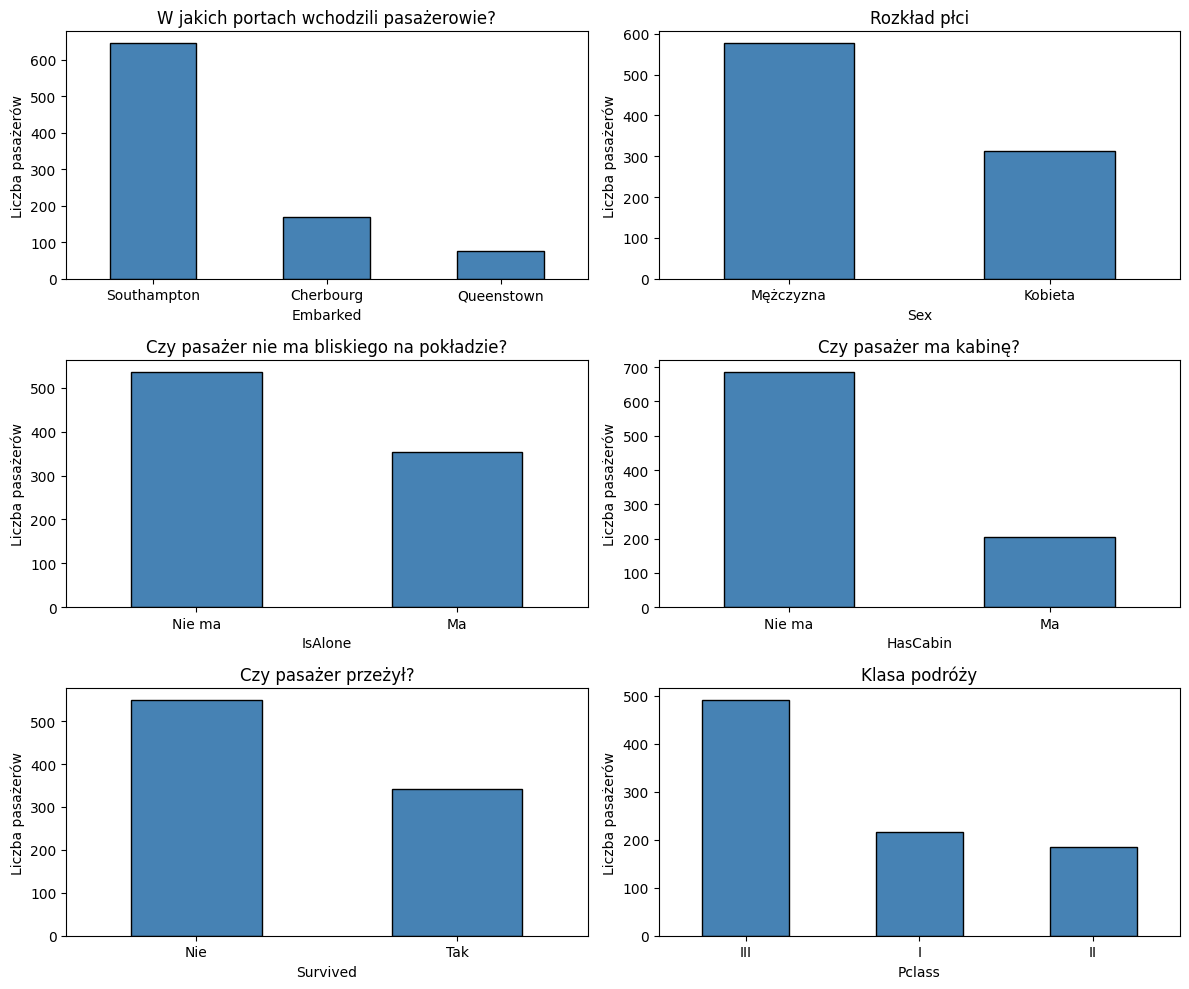

In [226]:
info = [
    ('Embarked', ['Southampton', 'Cherbourg', 'Queenstown'], 'W jakich portach wchodzili pasażerowie?'),
    ('Sex', ['Mężczyzna', 'Kobieta'], 'Rozkład płci'),
    ('IsAlone', ['Nie ma', 'Ma'], 'Czy pasażer nie ma bliskiego na pokładzie?'),
    ('HasCabin', ['Nie ma', 'Ma'], 'Czy pasażer ma kabinę?'),
    ('Survived', ['Nie', 'Tak'], 'Czy pasażer przeżył?'),
    ('Pclass', ['III', 'I', 'II'], 'Klasa podróży')
]

plt.figure(figsize=(12, 10))

for i, (col, labels, title) in enumerate(info, 1):
    plt.subplot(3, 2, i)
    counts = titanic_df[col].value_counts()

    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(title)
    plt.ylabel('Liczba pasażerów')
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

plt.tight_layout()
plt.show()

Teraz dokonajmy dokładniejszej analizy zmiennych względem klasy predykcyjnej `Survived`. \\
Zaczniemy od Bar plot. Zmienna predykowana: Survived. Kolumny kategorialne: Sex, Pclass, Embarked

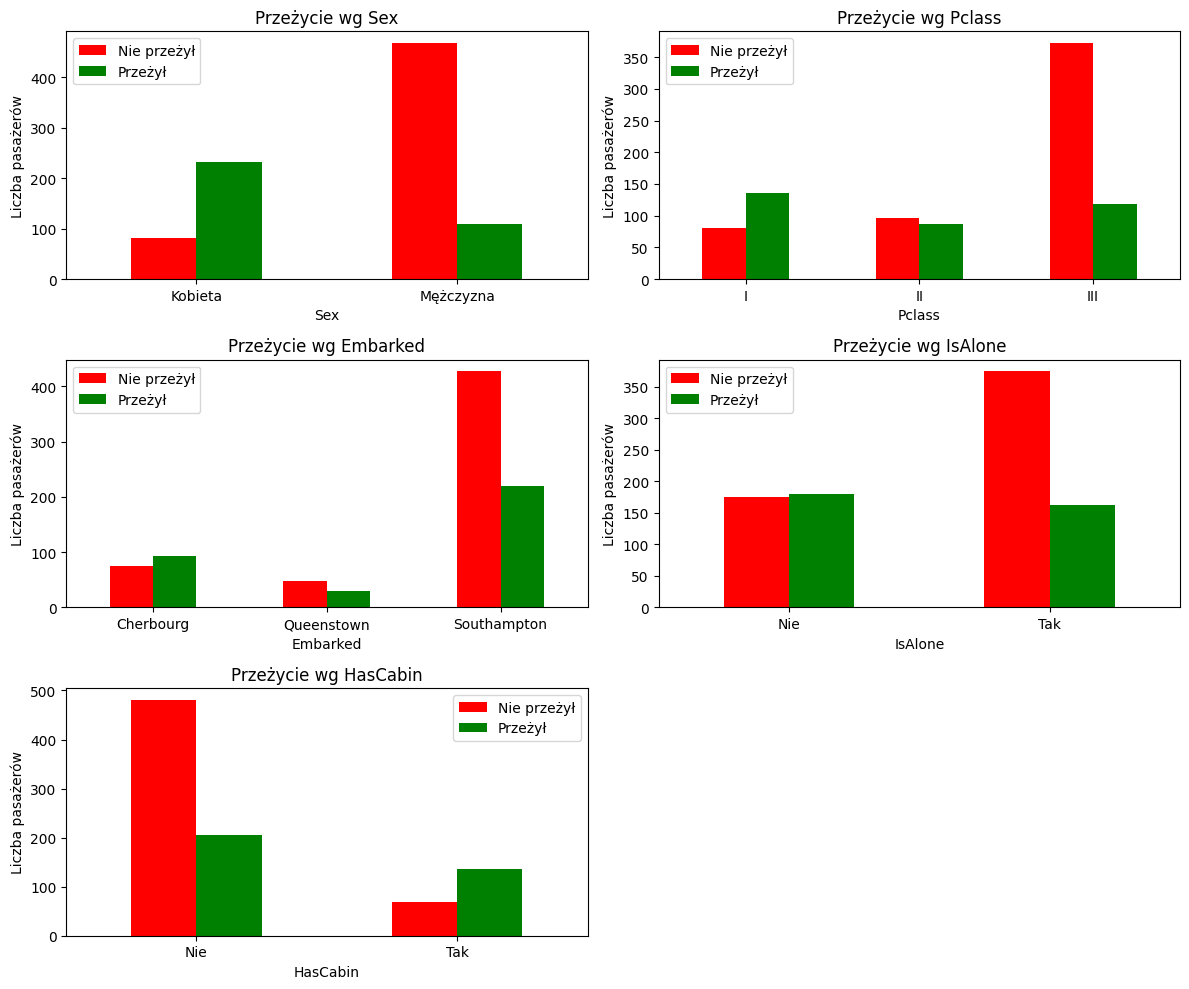

In [227]:
# Wszystkie kategorialne do analizy
cat_cols = ['Sex', 'Pclass', 'Embarked', 'IsAlone', 'HasCabin']

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)

    grouped = titanic_df.groupby([col, 'Survived']).size().unstack(fill_value=0)

    # Opcjonalne mapowanie etykiet na bardziej czytelne (dla Sex i inne)
    if col == 'Sex':
        grouped.index = grouped.index.map({2: 'Mężczyzna', 1: 'Kobieta'})
    elif col == 'Pclass':
        # sortujemy indeks by miał kolejność 1,2,3 i inne etykiety
        grouped = grouped.sort_index()
        grouped.index = grouped.index.map({1: 'I', 2: 'II', 3: 'III'})
    elif col == 'Embarked':
        grouped.index = grouped.index.map({3: 'Southampton', 1: 'Cherbourg', 2: 'Queenstown'})
    elif col == 'IsAlone' or col == 'HasCabin':
        grouped.index = grouped.index.map({0: 'Nie', 1: 'Tak'})

    # Rysujemy wykres słupkowy (grupowany, nie warstwowy)
    grouped.plot(kind='bar', stacked=False, ax=plt.gca(), color=['red', 'green'])

    plt.title(f'Przeżycie wg {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba pasażerów')
    plt.xticks(rotation=0)
    plt.legend(['Nie przeżył', 'Przeżył'])

plt.tight_layout()
plt.show()


Kobiety miały znacznie wyższe szanse na przeżycie niż mężczyźni, a pasażerowie podróżujący pierwszą klasą oraz posiadający kabinę również częściej przeżywali. Podróżujący sami mieli niższą przeżywalność w porównaniu z osobami będącymi z rodziną lub bliskimi na pokładzie. Wyjście z portu również miało umiarkowany wpływ na przeżycie, gdzie pasażerowie z Cherbourga wykazywali większą przeżywalność niż ci z Southampton i Queenstown.

Teraz dokonajmy analogicznej analizy względem `Survived`, ale wartości numerycznych i wykresem pudełkowym:

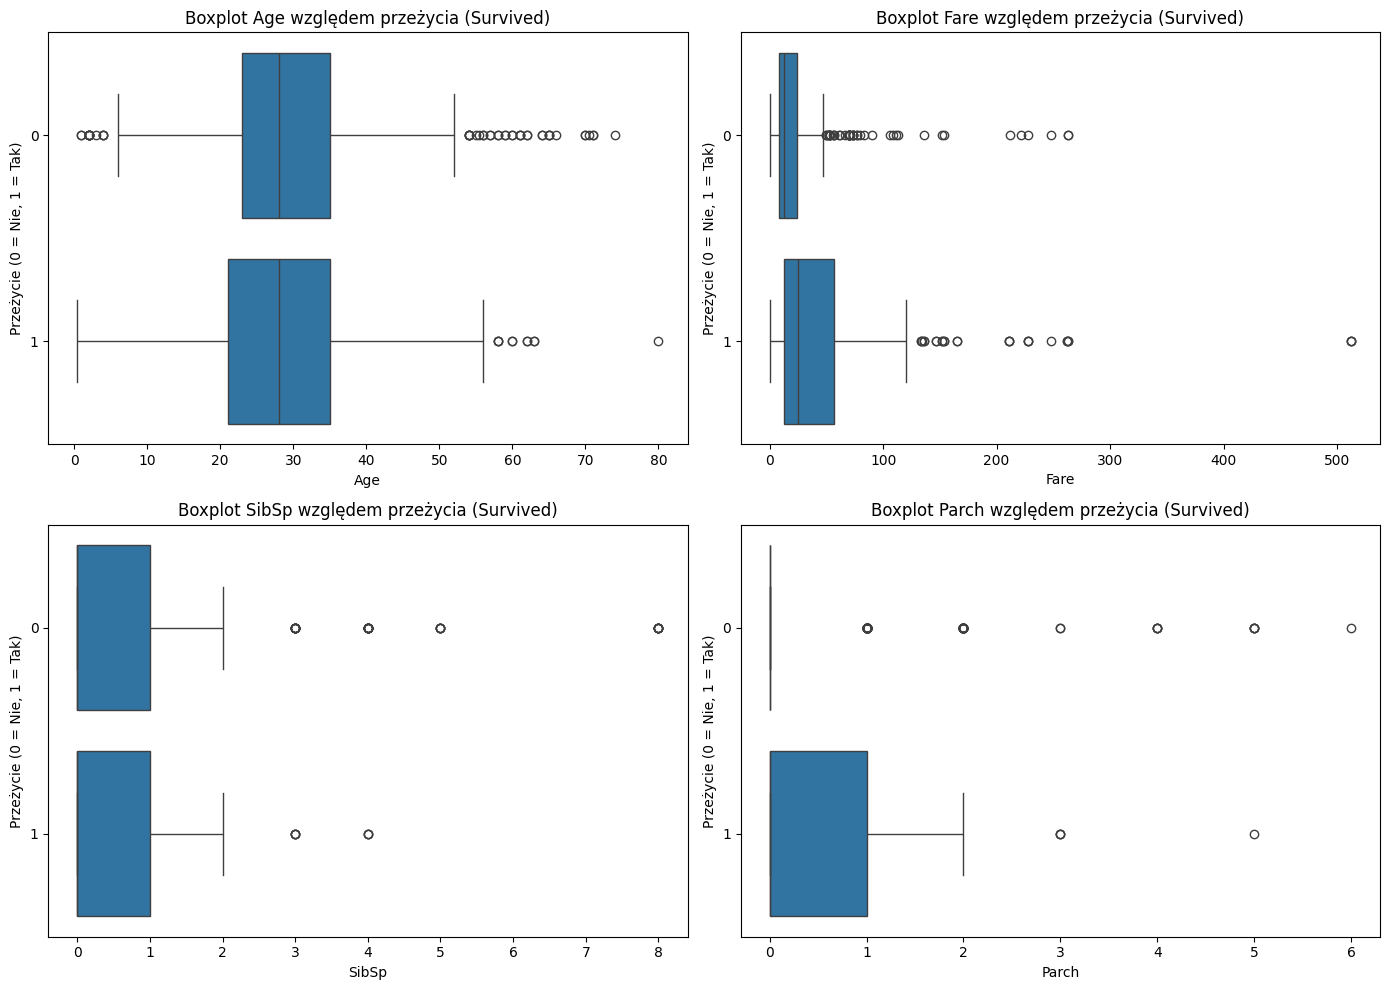

In [228]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='Survived', data=titanic_df, orient='h')
    plt.title(f'Boxplot {col} względem przeżycia (Survived)')
    plt.ylabel('Przeżycie (0 = Nie, 1 = Tak)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Tutaj widzimy, że niektóre wartości w `Age` i `Fare` zdecydowanie są outlinerami. Zbadajmy to dokładniej

In [229]:
def iqr_report(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper))
    return {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower fence': lower,
        'Upper fence': upper,
        'Liczba outlierów': outliers.sum(),
        'Procent outlierów': outliers.mean() * 100
    }

print("Fare:", iqr_report(titanic_df['Fare']))
print("Age:", iqr_report(titanic_df['Age']))


Fare: {'Q1': 8.05, 'Q3': 29.125, 'IQR': 21.075, 'Lower fence': -23.562499999999996, 'Upper fence': 60.7375, 'Liczba outlierów': np.int64(110), 'Procent outlierów': np.float64(12.345679012345679)}
Age: {'Q1': 22.0, 'Q3': 35.0, 'IQR': 13.0, 'Lower fence': 2.5, 'Upper fence': 54.5, 'Liczba outlierów': np.int64(66), 'Procent outlierów': np.float64(7.4074074074074066)}


`Fare` aż 13% próbek okazuje się outlinerami. `Age` ma ich niewiele – ok. 7% danych. Do dalszej analizy pozostawiamy Age bez zmian, natomiast dla Fare rozważymy transformację logarytmiczną.

In [230]:
titanic_df['Fare_log'] = np.log1p(titanic_df['Fare'])

# Finalna kontrola

Upewnijmy się, że na pewno nie ma żadnej wartości brakującej:

In [231]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
IsAlone,0
HasCabin,0


Sprawdźmy czy wszystkie kolumny są w formatach numerycznych:

In [232]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64
IsAlone,int64
HasCabin,int64


Zapis gotowych danych do nowego pliku csv:

In [233]:
out = titanic_df.reset_index()
titanic_df.to_csv('titanic_cleaned.csv', index=False)